<a href="https://colab.research.google.com/github/rikkucl/stochastic_weak_discrete_gradient/blob/feat_1%2F27/exp_sgd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

平滑性パラメータ L: 21978.45747449925
学習したパラメータ: [[[3.81565805 3.81565805]]

 [[2.96546863 2.96546863]]]


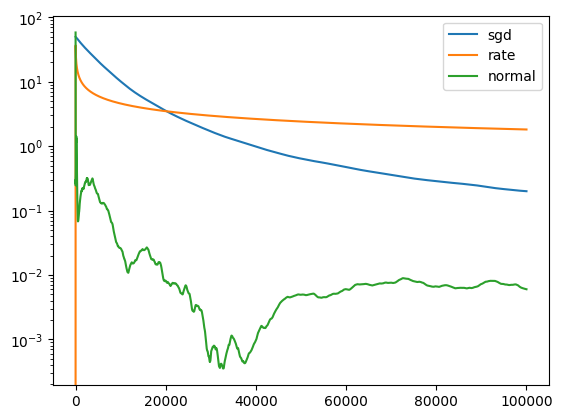

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

# データ生成
np.random.seed(40)
m = 10 ** 4
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + 10 * np.random.randn(m, 1)

X_b = np.c_[np.ones((m, 1)), X]  # Xにバイアス列を追加

# 最小二乗解の計算
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

A = X_b.T @ X_b  # X^T X を計算

# 平滑性パラメータ（最大固有値の計算）
L = np.linalg.eigvalsh(A).max()  # 固有値を計算して最大値を取得
print(f"平滑性パラメータ L: {L}")


#パラメータの初期化
theta = np.array([0, 0])
theta_n = np.array([0, 0])
theta_ave = np.array([0.0, 0.0], dtype=np.float64)
theta_n_ave = np.array([0.0, 0.0], dtype=np.float64)
v = np.array([0, 0])
z = np.array([0, 0])
# ハイパーパラメータ
n_iterations = 10 ** 5
eta = 0.1
m = len(y)

# プロットのための配列
err = []
err_ = []
init = []
norm = []
ite = []
rate = []


# 確率勾配法の実装
for iteration in range(1,n_iterations):
    random_index = np.random.randint(m)
    xi = X[random_index:random_index+1]
    yi = y[random_index:random_index+1]

    a_k =  math.sqrt(iteration)
    b_k = 1 +  L * math.sqrt(iteration) * ( 1 / ((iteration + 1) ** 2) + 1 / (iteration + (iteration + 1) ** 2) + 1 / (iteration  ) )

    # 勾配の計算
    gradient = np.array([ 2 * ( xi * theta[1] + theta[0] - yi ), 2 * xi * ( xi * theta[1] + theta[0] - yi )])
    theta = theta - a_k /(iteration * b_k) * gradient
    theta_ave = (iteration - 1) / iteration * theta_ave + 1 / iteration * theta
    loss = np.mean(((theta_best[1] * X + theta_best[0]) - (theta_ave[1] * X + theta_ave[0])) ** 2)
    err.append(loss)

    gradient_n = np.array([ 2 * ( xi * theta_n[1] + theta_n[0] - yi ), 2 * xi * ( xi * theta_n[1] + theta_n[0] - yi )])
    theta_n = theta_n -  (eta / (iteration ** (1/2)) ) * gradient_n
    theta_n_ave = (theta_n_ave * (iteration - 1) + theta_n) / iteration

    loss_ = np.mean(((theta_best[1] * X + theta_best[0]) - (theta_n_ave[1] * X + theta_n_ave[0])) ** 2)
    err_.append(loss_)

    ite.append(iteration + 1)

    # レートのプロット
    rate.append( (err[0] * math.log(iteration)) / iteration ** (1/2))


# 結果の表示
print("学習したパラメータ:", theta)

# 結果をプロット

plt.plot(ite, err, label="sgd")
plt.plot(ite, rate, label="rate")
plt.plot(ite, err_, label="normal")

ax = plt.gca()
ax.set_yscale("log")
plt.legend()
plt.show()
